In [1]:
import numpy as np 
from brian2tools import *
from tools.functions import *
from tools.srbm_reconstruction import *
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
date = '2023-04-22'
time = '20-45'
path = "output/"

W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB = load_matrices(date, time, path)


Matrices loaded from output/output/2023-04-22/20-45//


In [3]:
# load data that has been saved by main file 
length_stimuli = 200
num_classes = 5

train_test_sequence_data = load_data(len_stimuli = length_stimuli, 
                                    method="system",
                                    n_classes=num_classes,
                                    n_obs = 1000, 
                                    var_prot=0.2,
                                    repl_var=0.05)

if length_stimuli != N_v or num_classes != n_classes:
    print("The data does not fit the parameters in common_parameters.py. Please adjust the parameters in common_parameters.py to fit the data.")

Data loaded from data/data_system_5_0.2_0.05_200_1000.npy


In [4]:
# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

In [5]:
Ids = np.column_stack([
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(0, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0 ,
    create_single_Id(1, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(2, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0) * 0,
    create_single_Id(3, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0 ) * 0
    ]).T

In [5]:
def create_Id_pattern(n, data, N_v, N_c, n_c_unit, beta_parameter, on_off_ratio, seed = 0, data_mult = 1, class_mult = 0):
    np.random.seed(seed)
    Ids = [create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0)]
    labels_out = []
    labels = np.unique(data[1])
    for i in range(n):
        label = np.random.choice(labels, 1)[0]
        Ids.append(create_single_Id(label, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = class_mult, mult_data = data_mult))
        labels_out.append(label)
        for j in range(on_off_ratio):
            Ids.append(create_single_Id(0, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 0.0))
            labels_out.append(label)
    return (np.column_stack(Ids).T, labels_out)

In [6]:
n_patterns = 5
on_off_ratio = 2
Ids, labels = create_Id_pattern(n_patterns, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, beta_parameter = beta_parameter, 
                        on_off_ratio = on_off_ratio, seed = 14, data_mult = 1, class_mult = 0)
print(Ids.shape)
print(labels[::3])

(16, 220)
[3, 0, 4, 1, 2]


In [7]:
timepoints, t_sim, time_points_dict = create_timepoints(Ids, init_delay, delay, T)

In [8]:
out = main(W, b_v, b_c, b_h, t_sim = t_sim, Id = Ids, monitors = True)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

Creating equation


INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var/folders
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var/folders/07
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_pvu545ry
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew

2.4194469451904297


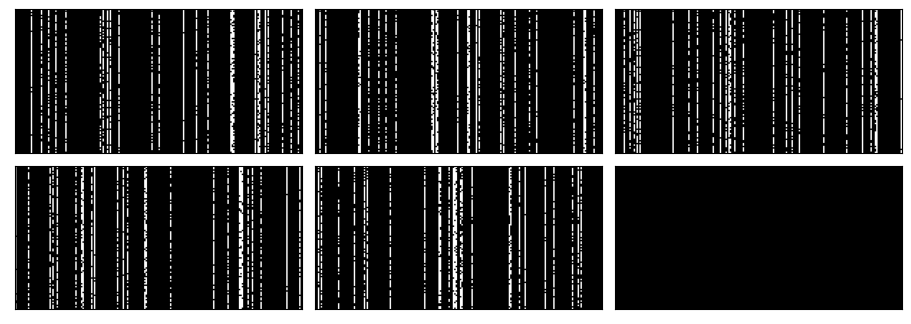

In [10]:
show_rows = int(N_inputs/2)
p1 = sequence_data[2][sequence_data[3] == 0][0:show_rows].reshape(show_rows, N_inputs)
p2 = sequence_data[2][sequence_data[3] == 1][0:show_rows].reshape(show_rows, N_inputs)
p3 = sequence_data[2][sequence_data[3] == 2][0:show_rows].reshape(show_rows, N_inputs)
p4 = sequence_data[2][sequence_data[3] == 3][0:show_rows].reshape(show_rows, N_inputs)
p5 = sequence_data[2][sequence_data[3] == 4][0:show_rows].reshape(show_rows, N_inputs)
p6 = np.zeros((show_rows, N_inputs))

plot_dat = [p1, p2, p3, p4, p5, p6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6), layout="compressed")

i = 0
for row in ax:
    for col in row:
        col.imshow(plot_dat[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        i += 1

plt.show()

#'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 
# 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 
# 'lanczos', 'blackman'

In [11]:
label_ids = np.arange(1, n_patterns*on_off_ratio, on_off_ratio+1) # every nth label is taken as each id pattern is shown for n timepoints and not present for n more 

plot_id1=np.array(np.repeat(Ids[label_ids[0]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id2=np.array(np.repeat(Ids[label_ids[1]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id3=np.array(np.repeat(Ids[label_ids[2]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id4=np.array(np.repeat(Ids[label_ids[3]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id5=np.array(np.repeat(Ids[label_ids[4]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T
plot_id6=np.array(np.repeat(Ids[label_ids[5]][0:N_inputs], show_rows)).reshape(N_inputs,show_rows).T

plot_ids = [plot_id1, plot_id2, plot_id3, plot_id4, plot_id5, plot_id6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6), layout="compressed")
i = 0
for row in ax:
    for col in row:
        col.imshow(plot_ids[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        col.set_title(labels[label_ids[i]])
        i += 1
plt.show()


IndexError: index 3 is out of bounds for axis 0 with size 3

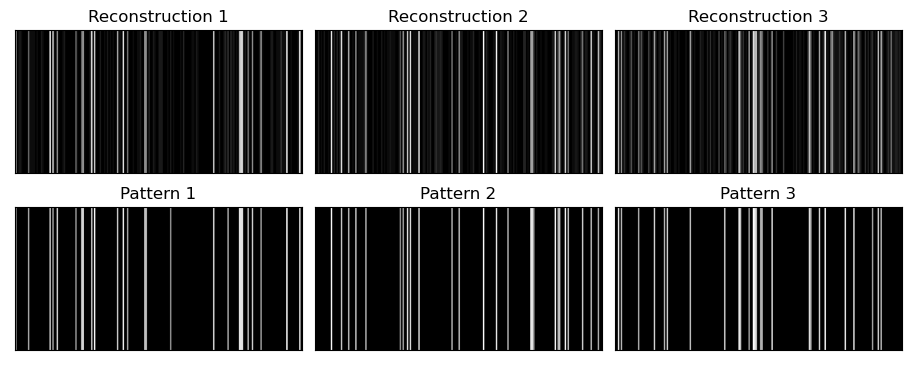

In [12]:
time_point_start_ids = np.arange(0, len(timepoints), (on_off_ratio+1) * 2) + 1
time_point_end_ids = np.arange(0, len(timepoints), (on_off_ratio+1) * 2) + 3

delay1 = 10, 
delay2 = delay1
delay3 = delay1

vist1 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[0]]+delay1*t_ref,timepoints[time_point_end_ids[0]])).T[1], show_rows).reshape(N_inputs,show_rows).T
vist2 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[1]]+delay2*t_ref,timepoints[time_point_end_ids[1]])).T[1], show_rows).reshape(N_inputs,show_rows).T
vist3 = np.repeat(np.array(spike_histogram(Mv,timepoints[time_point_start_ids[2]]+delay3*t_ref,timepoints[time_point_end_ids[2]])).T[1], show_rows).reshape(N_inputs,show_rows).T

p1 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[0]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T
p2 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[1]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T
p3 = np.repeat(np.mean(sequence_data[2][sequence_data[3] == labels[label_ids[2]]][0:show_rows].reshape(show_rows, N_inputs), axis=0), show_rows).reshape(N_inputs, show_rows).T

plt_list = [vist1, vist2, vist3, p1, p2, p3]
titles = ["Reconstruction 1", "Reconstruction 2", "Reconstruction 3", "Pattern 1", "Pattern 2", "Pattern 3"]

fig, ax = plt.subplots(2, 3, figsize=(9,6), layout="compressed")
i = 0
for row in ax:
    for col in row:
        col.imshow(plt_list[i], cmap='gray', interpolation="antialiased")
        col.axes.get_xaxis().set_ticks([])
        col.axes.get_yaxis().set_ticks([])
        col.set_title(titles[i])
        i += 1

plt.show()


In [13]:
frequency_classification(Mc, n_classes, n_c_unit, t_ref=t_ref, t_start=T1_s, t_end=T1_e*second, delay = 10)

p-value: 0.029. Confidence: High


3

In [14]:
def hamming_distance(x, y):
    return np.sum(np.abs(x - y))
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))
def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
def to_binary(data, threshold = 0.5):
    return np.array(data > threshold, dtype=np.int)
def rescale(spike_histogram, new_max = 1, threshold = None):
    if threshold is not None:
        spike_histogram = to_binary(spike_histogram, np.max(spike_histogram) * threshold)
    return spike_histogram * new_max / np.max(spike_histogram)
def plot_output(spike_histogram, depth = 100):
    length = len(spike_histogram)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.repeat(spike_histogram, depth).reshape(length, depth).T, cmap='gray')
    plt.show()

In [15]:
s_hist = np.array(spike_histogram(Mv,T3_s+delay1*t_ref,T3_e)).T[1]
s_bin = rescale(s_hist, 1, threshold=0.3)

orig_bin = to_binary(train_test_sequence_data[0][train_test_sequence_data[1] == 1][0], 0.5)

""" plot_output(s_bin)
plot_output(orig_bin)
s_bin """

' plot_output(s_bin)\nplot_output(orig_bin)\ns_bin '

In [16]:
mean_0 = np.mean(sequence_data[2][sequence_data[3] == 0][0:show_rows].reshape(show_rows, N_inputs), axis=0)
mean_1 = np.mean(sequence_data[2][sequence_data[3] == 1][0:show_rows].reshape(show_rows, N_inputs), axis=0)
mean_2 = np.mean(sequence_data[2][sequence_data[3] == 2][0:show_rows].reshape(show_rows, N_inputs), axis=0)
mean_3 = np.mean(sequence_data[2][sequence_data[3] == 3][0:show_rows].reshape(show_rows, N_inputs), axis=0)
mean_4 = np.mean(sequence_data[2][sequence_data[3] == 4][0:show_rows].reshape(show_rows, N_inputs), axis=0)

orig_bin_0 = to_binary(mean_0, 0.5)
orig_bin_1 = to_binary(mean_1, 0.5)
orig_bin_2 = to_binary(mean_2, 0.5)
orig_bin_3 = to_binary(mean_3, 0.5)
orig_bin_4 = to_binary(mean_4, 0.5)

dist_01 = hamming_distance(orig_bin_0, orig_bin_1)
dist_02 = hamming_distance(orig_bin_0, orig_bin_2)
dist_03 = hamming_distance(orig_bin_0, orig_bin_3)
dist_04 = hamming_distance(orig_bin_0, orig_bin_4)
dist_12 = hamming_distance(orig_bin_1, orig_bin_2)
dist_13 = hamming_distance(orig_bin_1, orig_bin_3)
dist_14 = hamming_distance(orig_bin_1, orig_bin_4)
dist_23 = hamming_distance(orig_bin_2, orig_bin_3)
dist_24 = hamming_distance(orig_bin_2, orig_bin_4)
dist_34 = hamming_distance(orig_bin_3, orig_bin_4)

distances = [dist_01, dist_02, dist_03, dist_04, dist_12, dist_13, dist_14, dist_23, dist_24, dist_34]
distances

[51, 52, 52, 52, 51, 51, 51, 52, 52, 52]

In [17]:
spike_hist_0_hidden = np.array(spike_histogram(Mh,time_points_dict["T7_s"]+delay1*t_ref,time_points_dict["T7_e"])).T[1]
spike_hist_1_hidden = np.array(spike_histogram(Mh,time_points_dict["T10_s"]+delay1*t_ref,time_points_dict["T10_e"])).T[1]

spike_hist_3_hidden = np.array(spike_histogram(Mh,time_points_dict["T1_s"]+delay1*t_ref,time_points_dict["T1_e"])).T[1]
spike_hist_4_hidden = np.array(spike_histogram(Mh,time_points_dict["T4_s"]+delay1*t_ref,time_points_dict["T4_e"])).T[1]


spike_hist_0_hidden_scaled = rescale(spike_hist_0_hidden, 1)
spike_hist_1_hidden_scaled = rescale(spike_hist_1_hidden, 1)
spike_hist_3_hidden_scaled = rescale(spike_hist_3_hidden, 1)
spike_hist_4_hidden_scaled = rescale(spike_hist_4_hidden, 1)

dist_hidden_01 = hamming_distance(spike_hist_0_hidden_scaled, spike_hist_1_hidden_scaled)
#dist_hidden_02 = hamming_distance(spike_hist_0_hidden_scaled, spike_hist_2_hidden_scaled)
dist_hidden_03 = hamming_distance(spike_hist_0_hidden_scaled, spike_hist_3_hidden_scaled)
dist_hidden_04 = hamming_distance(spike_hist_0_hidden_scaled, spike_hist_4_hidden_scaled)
#dist_hidden_12 = hamming_distance(spike_hist_1_hidden_scaled, spike_hist_2_hidden_scaled)
dist_hidden_13 = hamming_distance(spike_hist_1_hidden_scaled, spike_hist_3_hidden_scaled)
dist_hidden_14 = hamming_distance(spike_hist_1_hidden_scaled, spike_hist_4_hidden_scaled)
#dist_hidden_23 = hamming_distance(spike_hist_2_hidden_scaled, spike_hist_3_hidden_scaled)
#dist_hidden_24 = hamming_distance(spike_hist_2_hidden_scaled, spike_hist_4_hidden_scaled)
dist_hidden_34 = hamming_distance(spike_hist_3_hidden_scaled, spike_hist_4_hidden_scaled)

distances_hidden = [dist_hidden_01, dist_hidden_03, dist_hidden_04, dist_hidden_13, dist_hidden_14, dist_hidden_34]
distances_hidden

[41.84000000000001, 40.48, 36.32000000000001, 45.68, 40.63999999999999, 40.4]

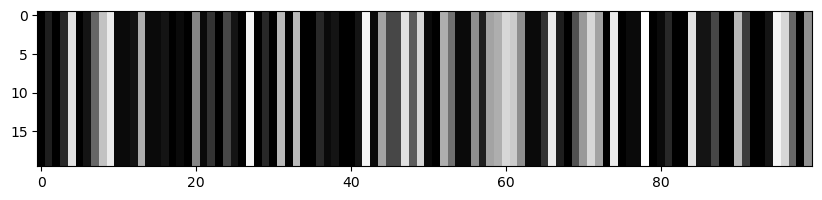

In [18]:
plot_output(spike_hist_0_hidden_scaled, depth=20)

In [19]:
print("Hamming distance: ", hamming_distance(s_bin, orig_bin), sep="")
print("Euclidean distance: ", euclidean_distance(s_bin, orig_bin), sep="")
print("RMSE: ", rmse(s_bin, orig_bin), sep="")
print("Cosine similarity: ", cosine_similarity(s_bin, orig_bin), sep="")


Hamming distance: 45.0
Euclidean distance: 6.708203932499369
RMSE: 0.4743416490252569
Cosine similarity: 0.0


WARNING    /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2tools/plotting/data.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)
 [py.warnings]
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



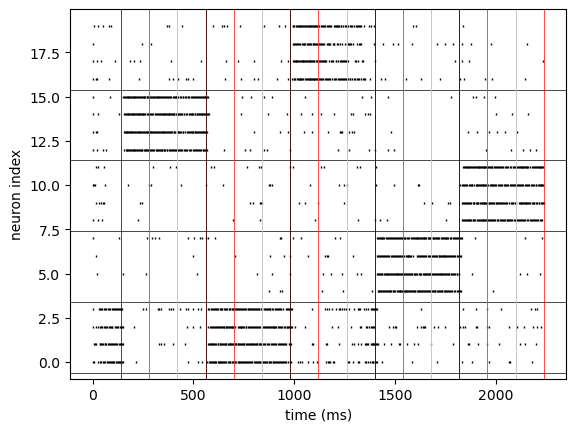

In [20]:

plot_raster(Mc.i, Mc.t, markersize=2, marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k', linewidth=0.5)
color_list = ['k', '#FFFFFF', "r"]
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

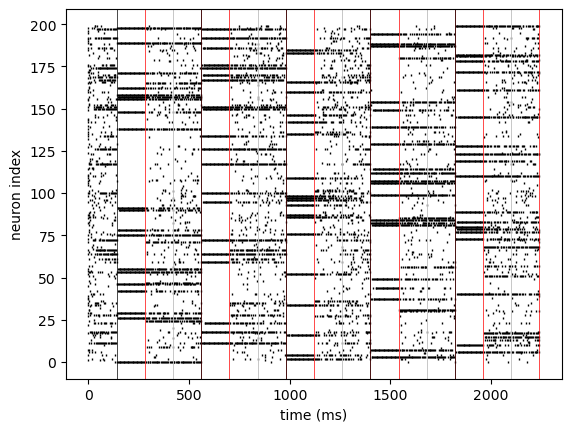

In [21]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1

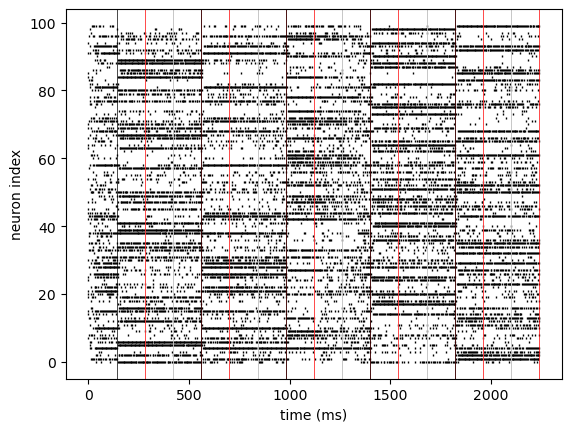

In [22]:
plot_raster(Mh.i, Mh.t, markersize=2,marker='|', color='k', mew=1)
col_cnt = 0
for i in timepoints:
    axvline(i/second*1000, color=color_list[col_cnt%len(color_list)], linewidth=0.5)
    col_cnt += 1